<a href="https://colab.research.google.com/github/yue-zhongqi/cartpole_colab/blob/main/cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial and Sample Code for Balancing a Pole on a Cart

## Installing dependencies:

In [1]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install "gymnasium[classic_control]" > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

# Added dependency
!pip install tensorflow > /dev/null 2>&1
!pip install imageio > /dev/null 2>&1
!pip install PIL > /dev/null 2>&1
!pip install opencv-python > /dev/null 2>&1
!pip instal moviepy > /dev/null 2>&1



## Importing dependencies and define helper functions

In [2]:
import gymnasium as gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")

## Video Generator

In [3]:
import imageio
import cv2

## Tutorial: Loading CartPole environment

In [6]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [6]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity.

In [7]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [8]:
observation = env.reset()
print("Initial observations:", observation)

Initial observations: (array([-0.01877474, -0.03903661,  0.01774204,  0.01963122], dtype=float32), {})


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [9]:
observation, reward, done, truncated, info = env.step(0)
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)
print("Is this round truncated?", truncated)
print("Info", info)

New observations after choosing action 0: [-0.01955548 -0.23440844  0.01813466  0.31785873]
Reward for this step: 1.0
Is this round done? False
Is this round truncated? False
Info {}


Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [10]:
observation = env.reset()
cumulative_reward = 0

# done is the same as teminated
done = False
while not done:
    observation, reward, done, truncated, info = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 9.0


In [11]:
# Note that the env.step method accept 5 return value not 4 anymore

## Begin Draft cells

In [65]:
import PIL.Image

(array([ 0.03716353,  0.00439414,  0.04022151, -0.00228465], dtype=float32), {})


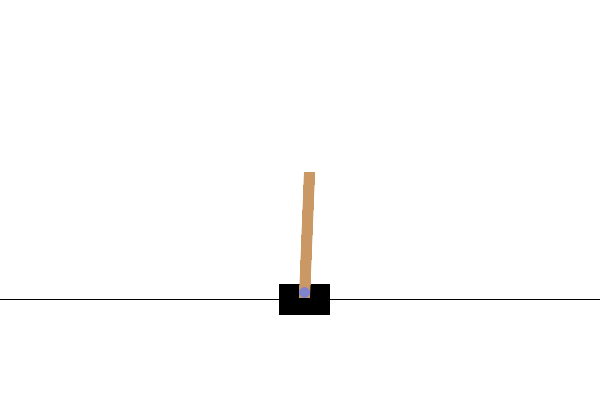

In [66]:
print(env.reset())
PIL.Image.fromarray(env.render())

(array([ 0.03725141, -0.19128087,  0.04017581,  0.30281243], dtype=float32), 1.0, False, False, {})


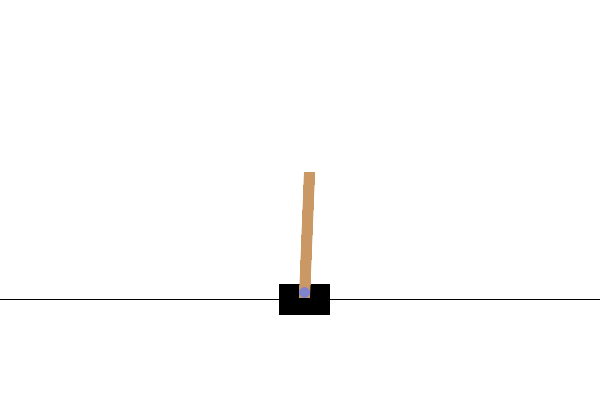

In [67]:
print(env.step(0))
PIL.Image.fromarray(env.render())

(array([ 0.03342579, -0.38695168,  0.04623206,  0.6078903 ], dtype=float32), 1.0, False, False, {})


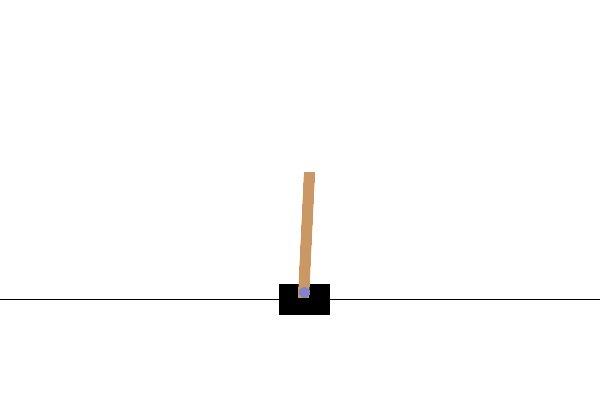

In [68]:
print(env.step(0))
PIL.Image.fromarray(env.render())

(array([ 0.02568676, -0.5826885 ,  0.05838987,  0.9147692 ], dtype=float32), 1.0, False, False, {})


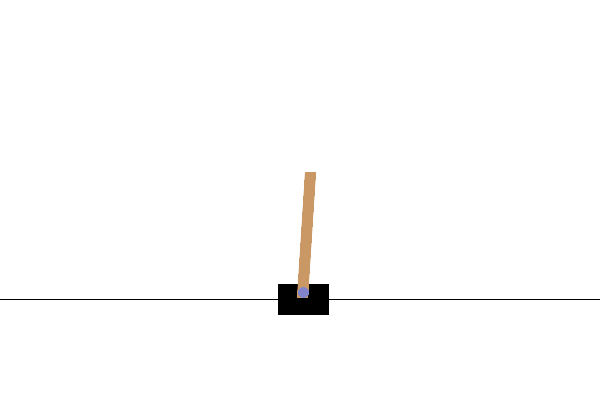

In [69]:
print(env.step(0))
PIL.Image.fromarray(env.render())

(array([ 0.01403299, -0.7785495 ,  0.07668525,  1.2252169 ], dtype=float32), 1.0, False, False, {})


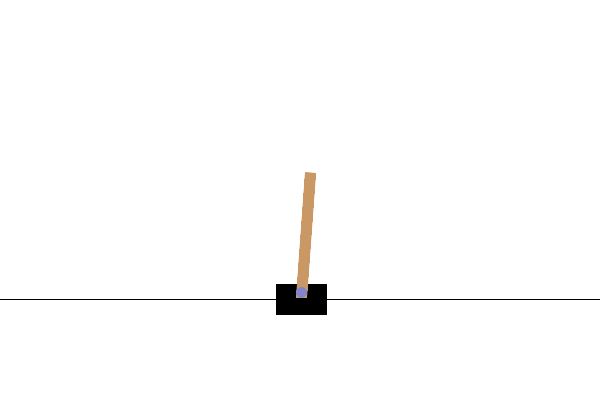

In [70]:
print(env.step(0))
PIL.Image.fromarray(env.render())

(array([-1.5380005e-03, -9.7457051e-01,  1.0118959e-01,  1.5409076e+00],
      dtype=float32), 1.0, False, False, {})


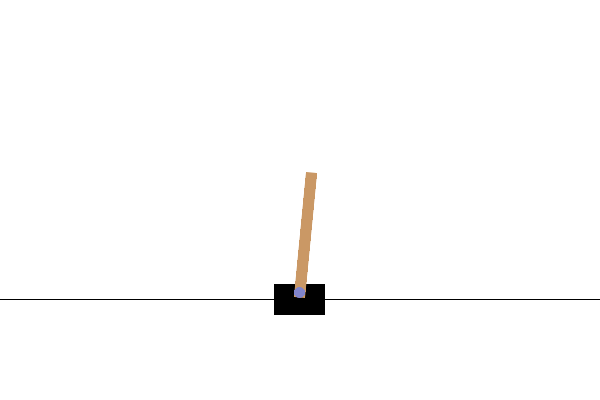

In [71]:
print(env.step(0))
PIL.Image.fromarray(env.render())

(array([-0.02102941, -1.1707534 ,  0.13200775,  1.8633755 ], dtype=float32), 1.0, False, False, {})


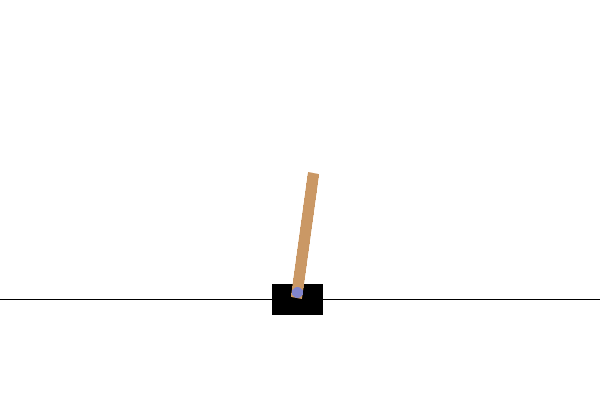

In [72]:
print(env.step(0))
PIL.Image.fromarray(env.render())

(array([-0.04444448, -1.3670518 ,  0.16927525,  2.1939592 ], dtype=float32), 1.0, False, False, {})


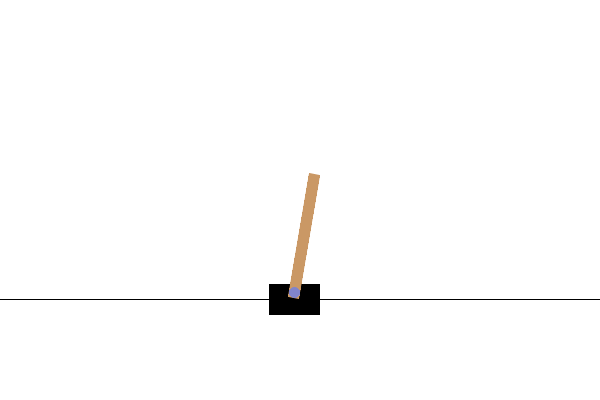

In [73]:
print(env.step(0))
PIL.Image.fromarray(env.render())

In [14]:
observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

## End Draft cells

## Task 1: Development of an RL agent

An example of a naive agent is given below, which randomly chooses an action regardless of the observation:

In [3]:
def rand_policy_agent(observation):
    return random.randint(0, 1)

For Task 1, we can show the observation and chosen action below:

In [16]:
observation = env.reset()
action = rand_policy_agent(observation)
print("Observation:", observation)
print("Chosen action:", action)

Observation: (array([-0.02440349,  0.04360436, -0.03353922, -0.04550894], dtype=float32), {})
Chosen action: 0


## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

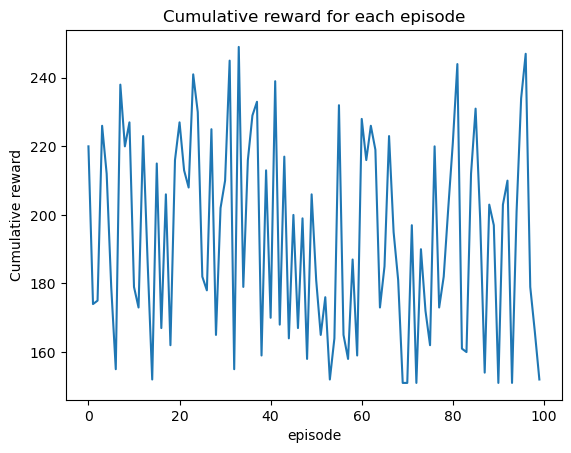

In [17]:
episode_results = np.random.randint(150, 250, size=100)
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

Print the average reward over the 100 episodes.

In [18]:
print("Average cumulative reward:", episode_results.mean())
print("Is my agent good enough?", episode_results.mean() > 195)

Average cumulative reward: 193.64
Is my agent good enough? False


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [6]:
# env = RecordVideo(gym.make("CartPole-v1"), "./video")
# observation = env.reset()
# while True:
#     env.render()
#     #your agent goes here
#     action = rand_policy_agent(observation)
#     observation, reward, done,truncated, info = env.step(action) 
#     if done: 
#         break;    
# env.close()
# show_video()

Could not find video


The first one work already

In [20]:
def create_video(filename, env, fps=30):
    
    image_size = (600, 400)
    
    video = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'H264'), fps, image_size)

    done = False
    state = env.reset()[0]
    frame = env.render()
    video.write(frame)
    while not done:
        state = np.expand_dims(state, axis=0)
        action = np.random.randint(2)
        state, _, done, _, _ = env.step(action)
        frame = env.render()
        video.write(frame)
    video.release()



In [15]:
def create_video(filename, env, fps=30):
    
    image_size = (600, 400)
    
    video = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'H264'), fps, image_size)

    done = False
    state = env.reset()[0]
    frame = env.render()
    video.write(frame)
    for i in range(0, 500):
        state = np.expand_dims(state, axis=0)
        action = np.random.randint(2)
        state, _, done, _, _ = env.step(action)
        frame = env.render()
        video.write(frame)
    video.release()



In [18]:
create_video("./video/video.mp4", env)

OpenCV: FFMPEG: tag 0x34363248/'H264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'


In [19]:
show_video()

In [24]:
env.reset()[0]

array([ 0.03907925,  0.03934466,  0.00188584, -0.0184071 ], dtype=float32)

In [25]:
def create_video(filename, env, q_network, fps=30):
    """
    Creates a video of an agent interacting with a Gym environment.

    The agent will interact with the given env environment using the q_network to map
    states to Q values and using a greedy policy to choose its actions (i.e it will
    choose the actions that yield the maximum Q values).
    
    The video will be saved to a file with the given filename. The video format must be
    specified in the filename by providing a file extension (.mp4, .gif, etc..). If you 
    want to embed the video in a Jupyter notebook using the embed_mp4 function, then the
    video must be saved as an MP4 file. 
    
    Args:
        filename (string):
            The path to the file to which the video will be saved. The video format will
            be selected based on the filename. Therefore, the video format must be
            specified in the filename by providing a file extension (i.e.
            "./videos/lunar_lander.mp4"). To see a list of supported formats see the
            imageio documentation: https://imageio.readthedocs.io/en/v2.8.0/formats.html
        env (Gym Environment): 
            The Gym environment the agent will interact with.
        q_network (tf.keras.Sequential):
            A TensorFlow Keras Sequential model that maps states to Q values.
        fps (int):
            The number of frames per second. Specifies the frame rate of the output
            video. The default frame rate is 30 frames per second.  
    """

    with imageio.get_writer(filename, fps=fps) as video:
        done = False
        state = env.reset()
        frame = env.render(mode="rgb_array")
        video.append_data(frame)
        while not done:
            state = np.expand_dims(state, axis=0)
            q_values = q_network(state)
            action = np.argmax(q_values.numpy()[0])
            state, _, done, _, _ = env.step(action)
            frame = env.render(mode="rgb_array")
            video.append_data(frame)



In [ ]:
embed_mp4("video/video.mp4")

In [ ]:
from ipywidgets import Video
Video.from_file("video/video.mp4", width=600, height=400, play=True)

In [ ]:
from IPython.display import Video

In [ ]:
Video("video/video.mp4", embed=True)

In [ ]:
show_video()

In [24]:
env.reset()

(array([-0.01969871,  0.01846999,  0.01770896, -0.01112886], dtype=float32),
 {})

In [62]:
print(env.reset(seed=4)[0][2])
env.step(0)[0][2]
env.step(0)[0][2]




0.047624372


0.05209412

In [53]:
np.pi

3.141592653589793

In [29]:
np.abs(-2)

2

In [63]:
import random
random.seed(0)

In [74]:
for i in (100, 50):
    print(i)

100
50


In [99]:
a = np.random.randint(0,2,100)
count1 = 0
count0 = 0
for i in range(100):
    if a[i]:
        count1 += 1
    else:
        count0 += 1
print("1: ", count1)
print("0: ", count0)

1:  49
0:  51
